<h1><center>EDA</center></h1>

                                                   ~ LOGISTICS

In [1]:
# Logistical variables
logistics = {'bg':'project background',
            'term':'terms and definitions',
            'obj': 'project objective',
            'satdict': 'SAT data in dictionary',
            'data_dict': 'information about my data',
            'df_verma': '10 states with the greatest gap between Verbal and Math scores, where Verbal scores are higher than math'}

# Background information
bg = {'bg':'''move the needle on one of two separate issues: high school education outcomes, 
      or drug abuse in the community'''}

terms = {'hypothesis': 'A theory that needs to be verified by experiments'}

obj = {'objective': 'Explore the data, find patterns, and conclude with a a few hypotheses for policy recommendation',
    'others':'Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions'}



                                                    ~IMPORT

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<h4> Manually processing the data from csv file into a dictionary </h4>

In [94]:
state = []
rate = []
verbal = []
math = []

with open ('sat_scores.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        state.append(row['State'])
        rate.append(row['Rate'])
        math.append(row['Math'])
        verbal.append(row['Verbal'])
        
satdict = {'State': state,
       ' Rate': rate,
       'Verbal': verbal,
       'Math': math}

df_0 = pd.DataFrame(satdict)
df_0.dtypes

State     object
 Rate     object
Verbal    object
Math      object
dtype: object

<h4> using pandas read_csv function</h4>

In [93]:
#pandas read_csv function is able to detech the data types within each column
df = pd.read_csv('sat_scores.csv')
columns = df.columns
df.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [7]:
# Describes the north-eastern states in the US
df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


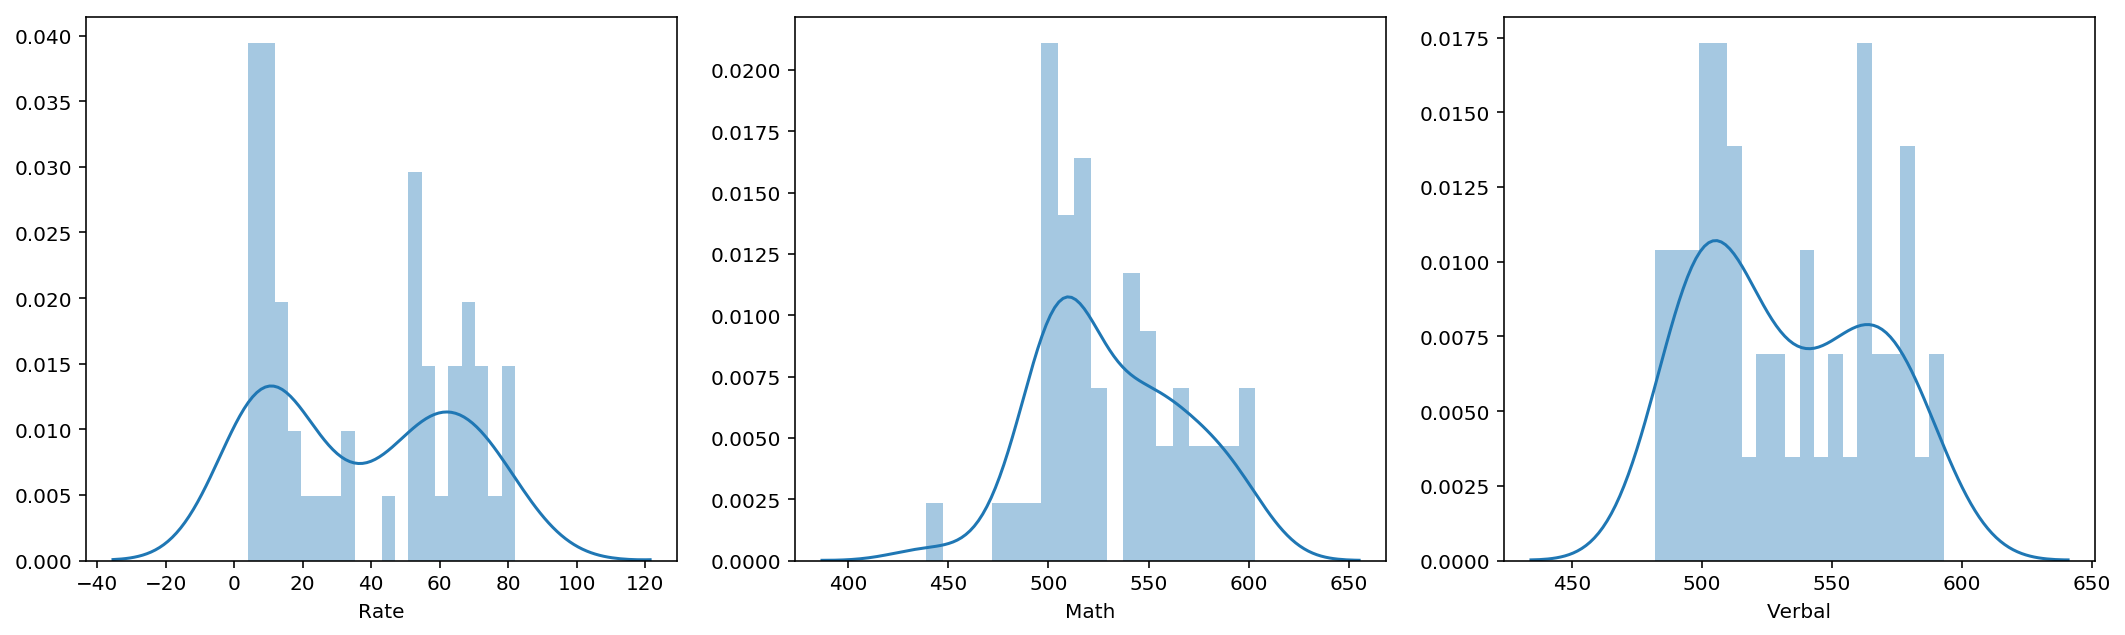

In [97]:
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.distplot(df['Rate'], ax=axes[0], bins=20)
sns.distplot(df['Math'], ax=axes[1], bins=20)
sns.distplot(df['Verbal'], ax=axes[2], bins=20)

In [33]:
df.head()

,State,Rate,Verbal,Math,Verbal-Math,Math-Verbal
0,CT,82,509,510,-1,1
1,NJ,81,499,513,-14,14
2,MA,79,511,515,-4,4
3,NY,77,495,505,-10,10
4,NH,72,520,516,4,-4


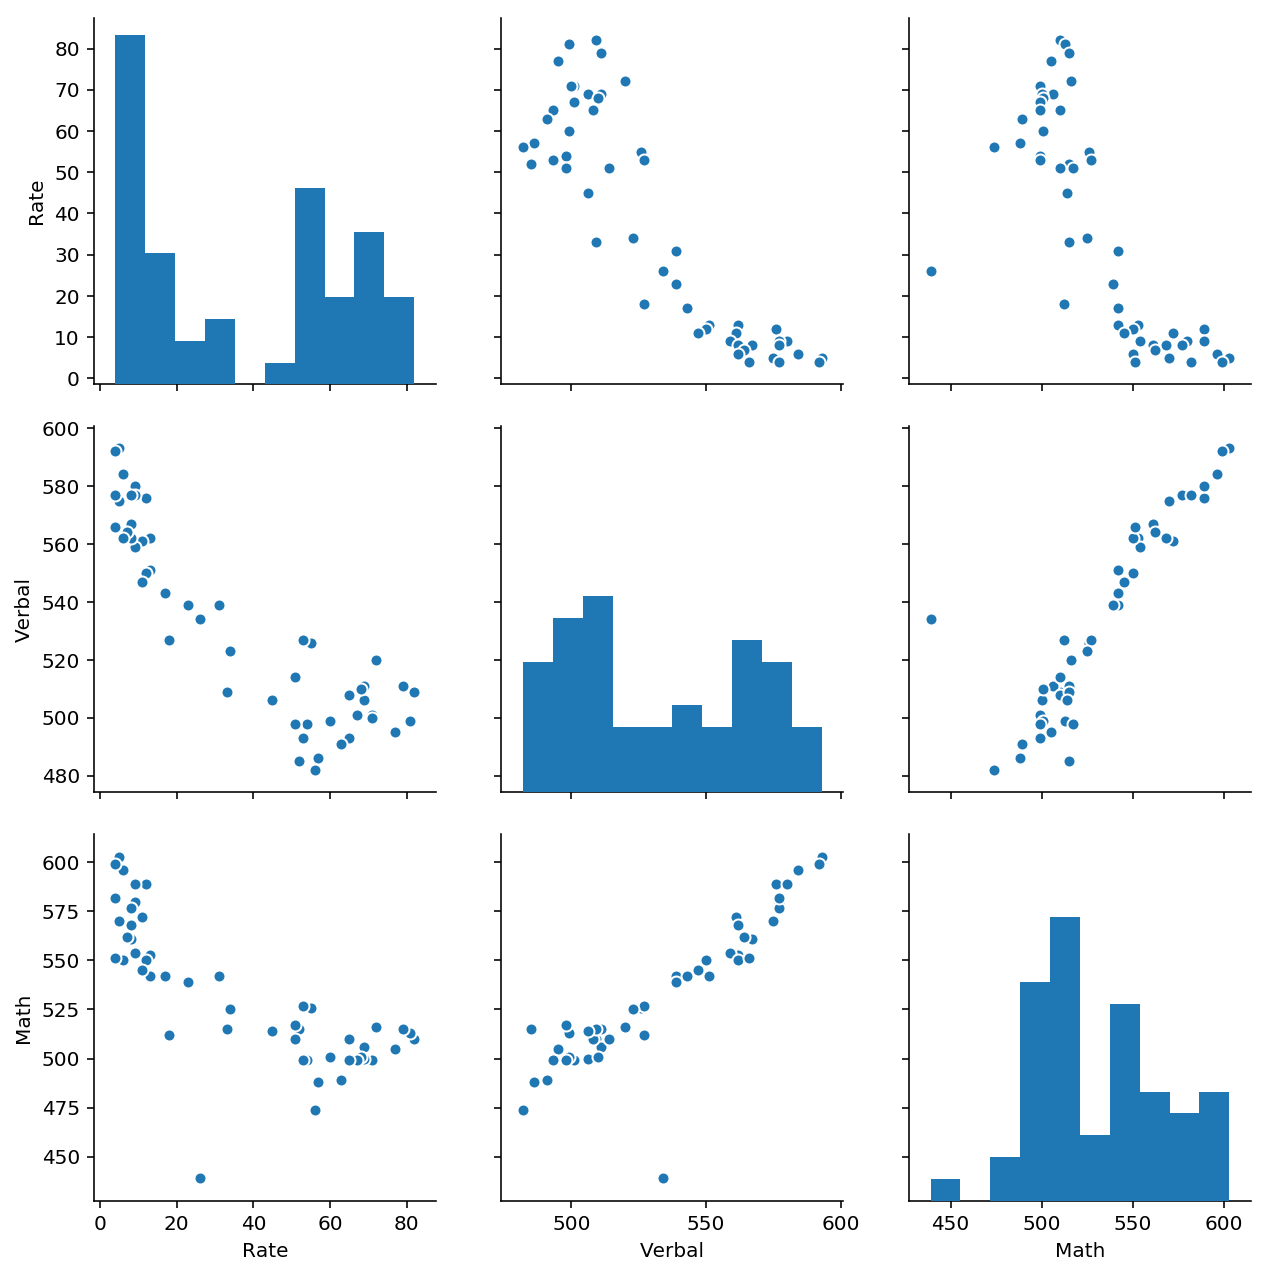

In [110]:
sns.pairplot(df, size=3)


## 4. Plot the data using built-in pandas functions.


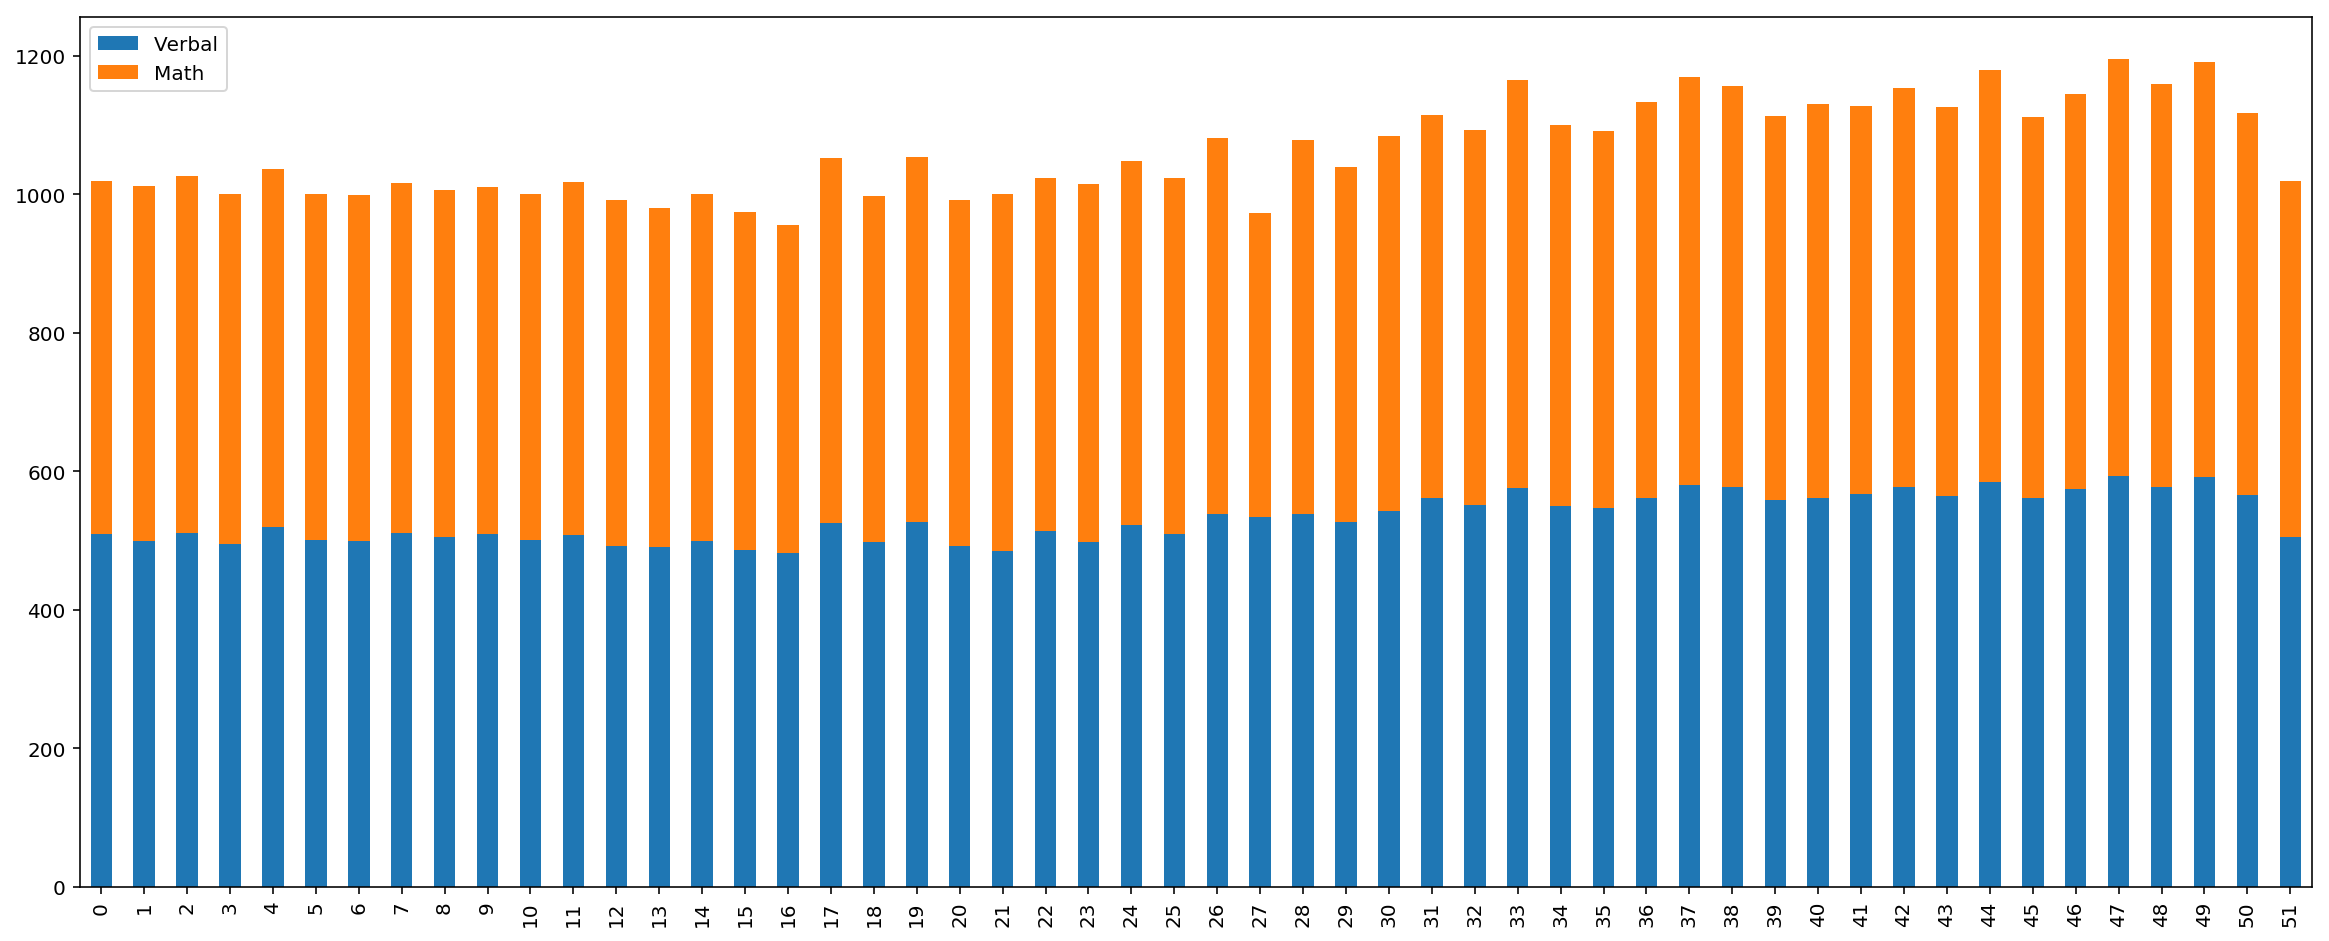

In [111]:
vermath = df.loc[:,['Verbal', 'Math']]
vermath.plot(kind='bar', stacked = True, figsize=(20,8))

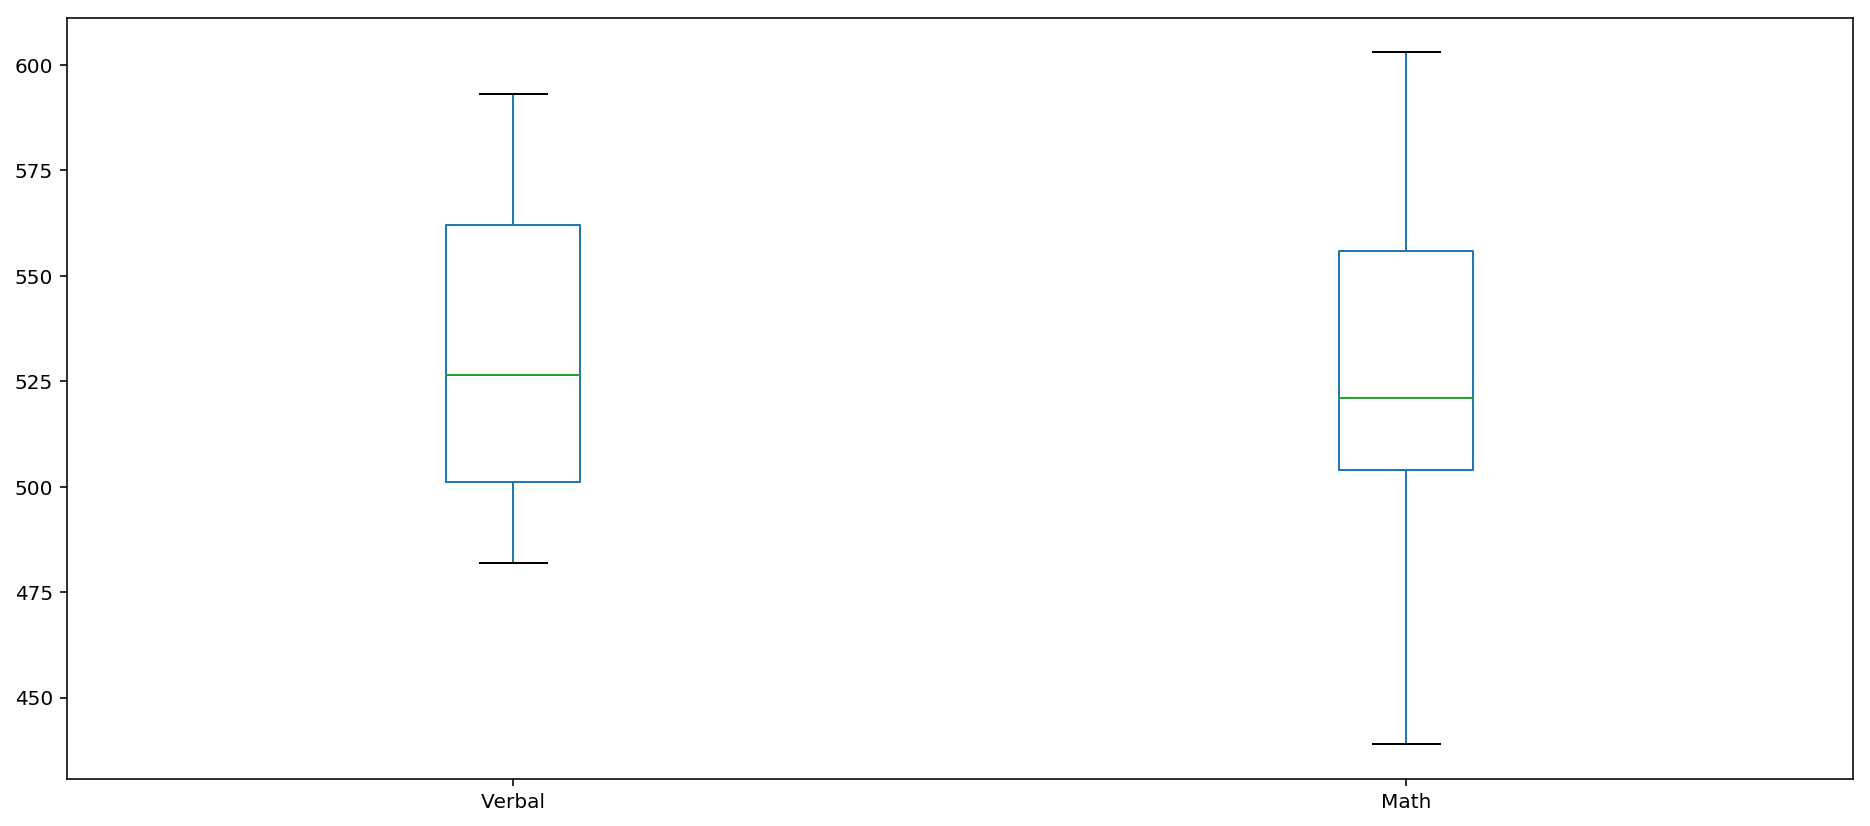

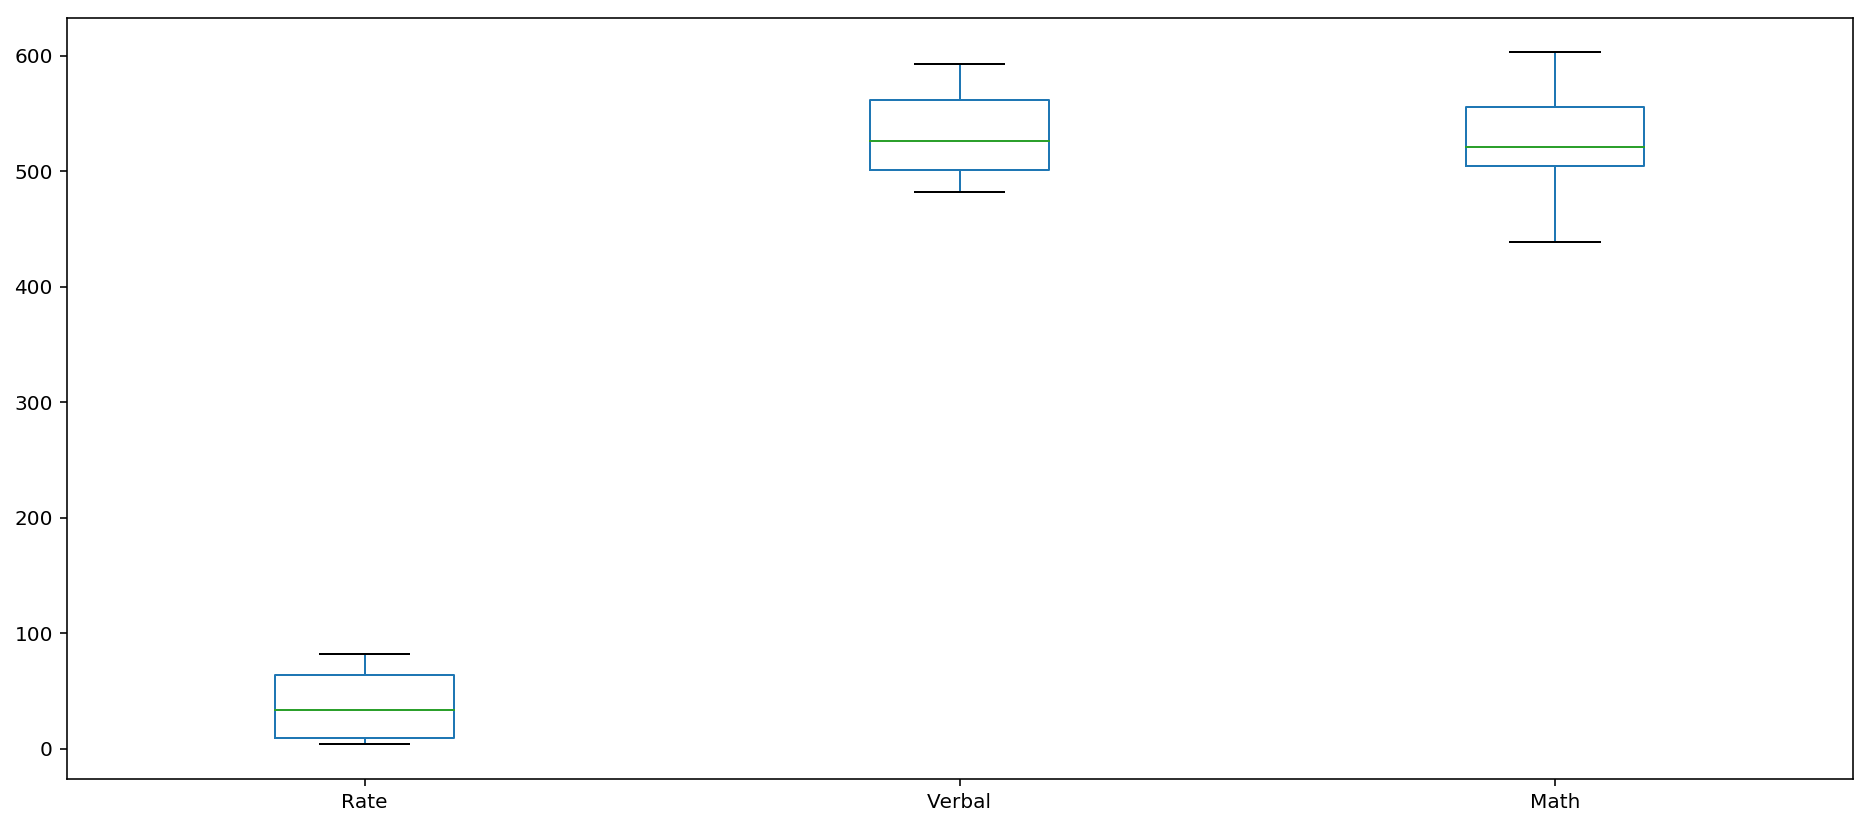

In [112]:
vermath.plot(kind='box', figsize=(16,7))
df.plot(kind='box', figsize=(16,7))

In [113]:
df['Rate'].std()

27.301788072869286

#### standardizing the values for comparision

In [120]:
# The only way I can compare all three columns is to standardize the values.
cols = list(df.columns)
cols.remove('State')
cols

# cols is now a list of the columns names I want to compute the z-score
df[cols] 
for col in cols:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean()) / df[col].std(ddof=0)
    
# reassigning modifications of the data frames accordingly
df_full = df.copy() # original and z scores
df_zscore = df_full[['Rate_zscore','Verbal_zscore', 'Math_zscore']].copy() # only the z scores
df = df_full[['State', 'Rate', 'Verbal', 'Math']].copy()

In [121]:
columns_zscore = df_zscore.columns
columns_zscore

Index(['Rate_zscore', 'Verbal_zscore', 'Math_zscore'], dtype='object')

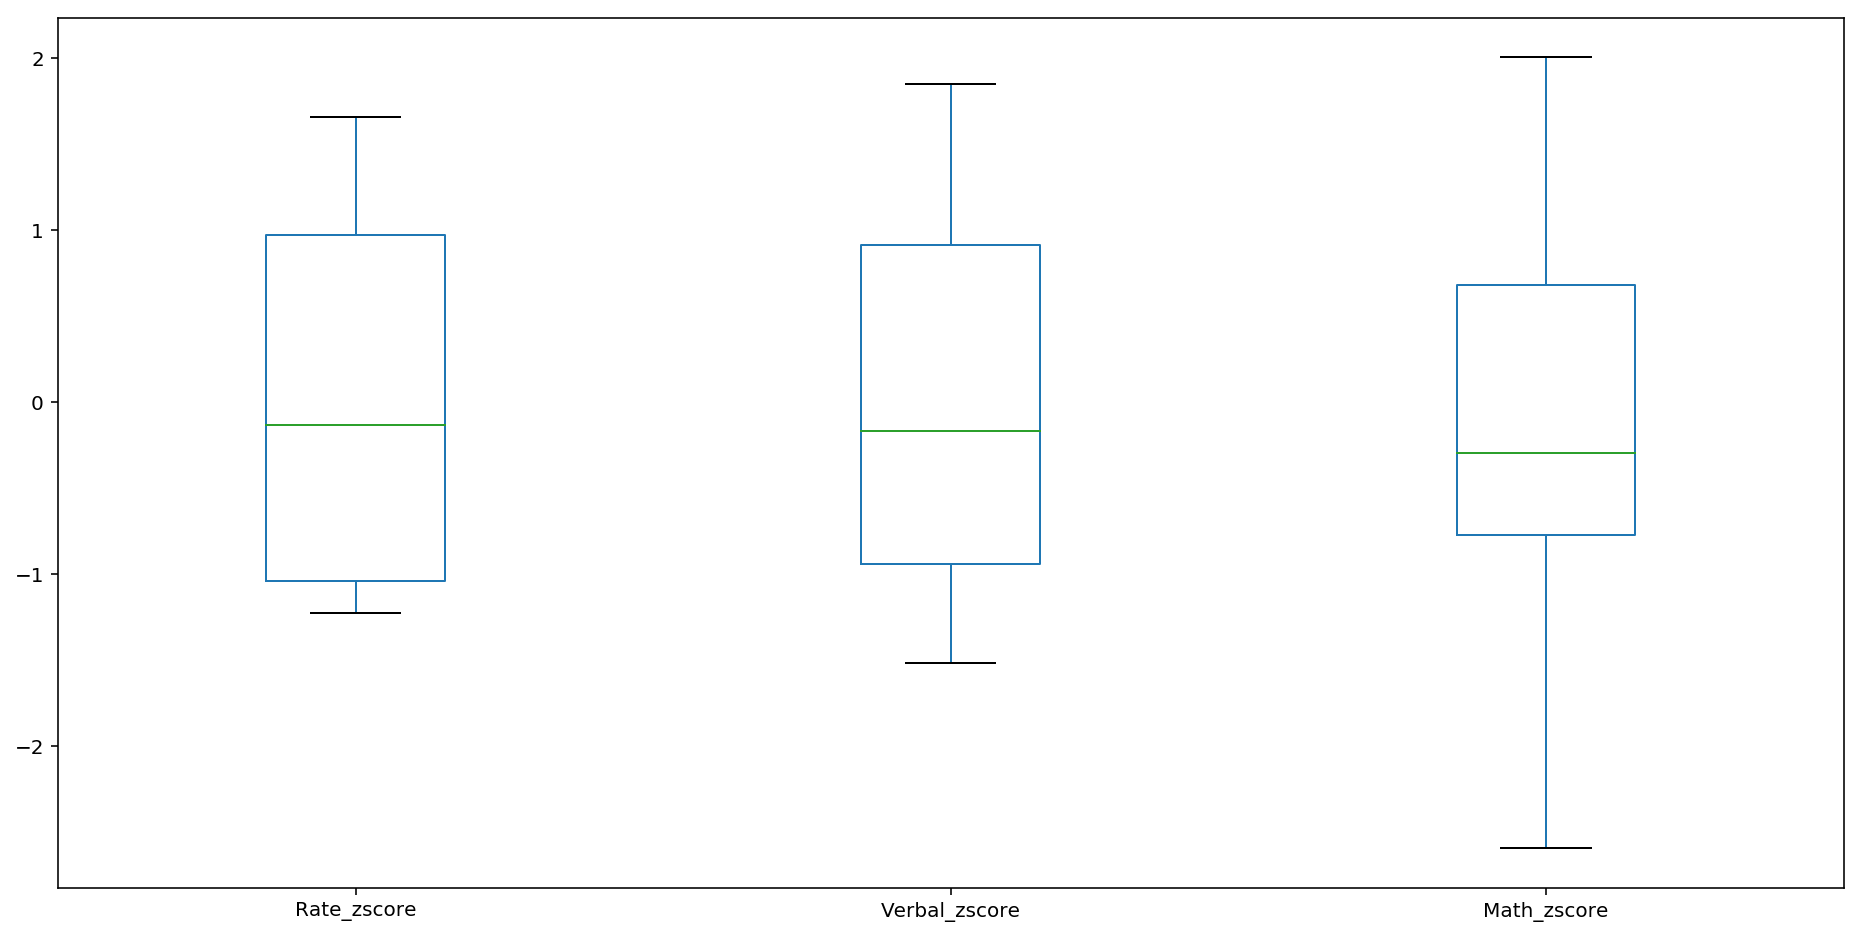

In [122]:
df_zscore = df_zscore[['Rate_zscore', 'Verbal_zscore', 'Math_zscore']]
df_zscore.plot(kind='box', figsize=(16,8))

In [123]:
df['Verbal'].mean()

532.0192307692307

In [124]:
# 24 states above the mean
len(df[df['Verbal'] > df['Verbal'].mean()])

24

In [125]:
# 46 % of states are above the mean
round((24 / float(len(df))), 2)

0.46

In [126]:
df['Verbal'].median()

526.5

In [127]:
len(df[df['Verbal'] > df['Verbal'].median()])

26

##### 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math.

In [128]:
# new column
df['Verbal-Math'] = df['Verbal'].copy() - df['Math'].copy()
# new frame
df_verma = df[['State','Verbal-Math']].copy()
# filter > 
df_verma = df_verma[df_verma['Verbal-Math'] > 0].copy()
# sort and take the first 10
df_verma = df_verma.sort_values(by=['Verbal-Math'], ascending=False)[:10].copy()
# reset index
df_verma.reset_index(inplace=True)
# rename column
df_verma.rename(columns = {'index':'df_id'}, inplace=True)

##### 10 states with the greatest gap between Math and Verbal scores where Math is greater than Verbal.

In [129]:
df['Math-Verbal'] = df['Math'] - df['Verbal']
df_maver = df[['State','Math-Verbal']]
df_maver = df_maver[df_maver['Math-Verbal'] > 0]
df_maver.sort_values(by=['Math-Verbal'], ascending=False, inplace=True)
df_maver = df_maver[:10].copy() 
# I THINK THE ERROR IS HERE. WHEN I USE ILOC I WILL HAVE TO USE THE COPY. 
# ASSOCIATING A VARIABLE WITH THE ILOC FUNCTION WILL EFFECT A CHANCE IN THE ORIGINAL DATAFRAME WHEN I DO 
# SOMETHING TO THE NEW VARIABLE.
df_maver.reset_index(inplace=True)
df_maver.rename(columns= {'index':'df_id'}, inplace=True)

In [130]:
print ('VERBAL - MATH \n')
print (df_verma.head(3))

print ('\n MATH - VERBAL \n')
print (df_maver.head(3))

VERBAL - MATH 

   df_id State  Verbal-Math
0     27    OH           95
1     29    WV           15
2     50    MS           15

 MATH - VERBAL 

   df_id State  Math-Verbal
0     21    HI           30
1     23    CA           19
2      1    NJ           14


## 6. Examine summary statistics

In [131]:
df_corr = df.drop(columns=['State','Verbal-Math','Math-Verbal'])
df_corr.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


In [132]:
df.describe()

,Rate,Verbal,Math,Verbal-Math,Math-Verbal
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231,-0.519231
std,27.301788,33.236225,36.014975,15.729939,15.729939
min,4.000000,482.000000,439.000000,-30.000000,-95.000000
25%,9.000000,501.000000,504.000000,-6.000000,-4.250000
50%,33.500000,526.500000,521.000000,0.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000,6.000000
max,82.000000,593.000000,603.000000,95.000000,30.000000


In [133]:
df_cov = df.drop(columns=['State','Verbal-Math','Math-Verbal'])
df_cov.cov()

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


                                                    ~ LOGISTICS

In [134]:
drug_df = pd.read_csv("drug-use-by-age.csv")
drug_cols = drug_df.columns

In [135]:
drug_info = {'use':'Percentage of those in an age group who used alcohol in the past 12 months',
            'frequency': 'Median number of times a user in an age group used alcohol in the past 12 months'}
drug_remember = {'1': 'Talking about usage in in the past 12 months',
                '2': 'Talking about the percentage of users within an age group',
                '3': 'Talking about the median number of times somethign has been used within an age group'}

In [136]:
drug_df.head(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [137]:
drug_df.tail(5)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [138]:
drug_df.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

#### Focus on 3 columns

In [139]:
# I want to focus only on alcohol, marijuana and cocain
almaco = drug_df.iloc[:,:8].drop(columns='n')
almaco_cols = almaco.columns
almaco_cols

Index(['age', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency'],
      dtype='object')

#### Cleaning up cocaine-frequency

In [140]:
# Replacing the dash to np.nan - all cells.
almaco = almaco.apply(lambda x: x.replace('-', np.nan))
# changing the data type in the series (there isn't an inplace function)
almaco['cocaine-frequency'] = almaco['cocaine-frequency'].astype('float')

In [141]:
almaco.columns

Index(['age', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency'],
      dtype='object')

In [142]:
almaco = almaco.set_index('age')

In [143]:
almaco

,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency
age,,,,,,
12,3.9,3.0,1.1,4.0,0.1,5.0
13,8.5,6.0,3.4,15.0,0.1,1.0
14,18.1,5.0,8.7,24.0,0.1,5.5
15,29.2,6.0,14.5,25.0,0.5,4.0
16,40.1,10.0,22.5,30.0,1.0,7.0
17,49.3,13.0,28.0,36.0,2.0,5.0
18,58.7,24.0,33.7,52.0,3.2,5.0
19,64.6,36.0,33.4,60.0,4.1,5.5
20,69.7,48.0,34.0,60.0,4.9,8.0


In [144]:
# Since use and frequency are in different units, am separating them to analyze them separately. 
almaco_use = almaco[['alcohol-use','marijuana-use','cocaine-use']]
almaco_freq = almaco[['alcohol-frequency','marijuana-frequency','cocaine-frequency']]

#### bar plot

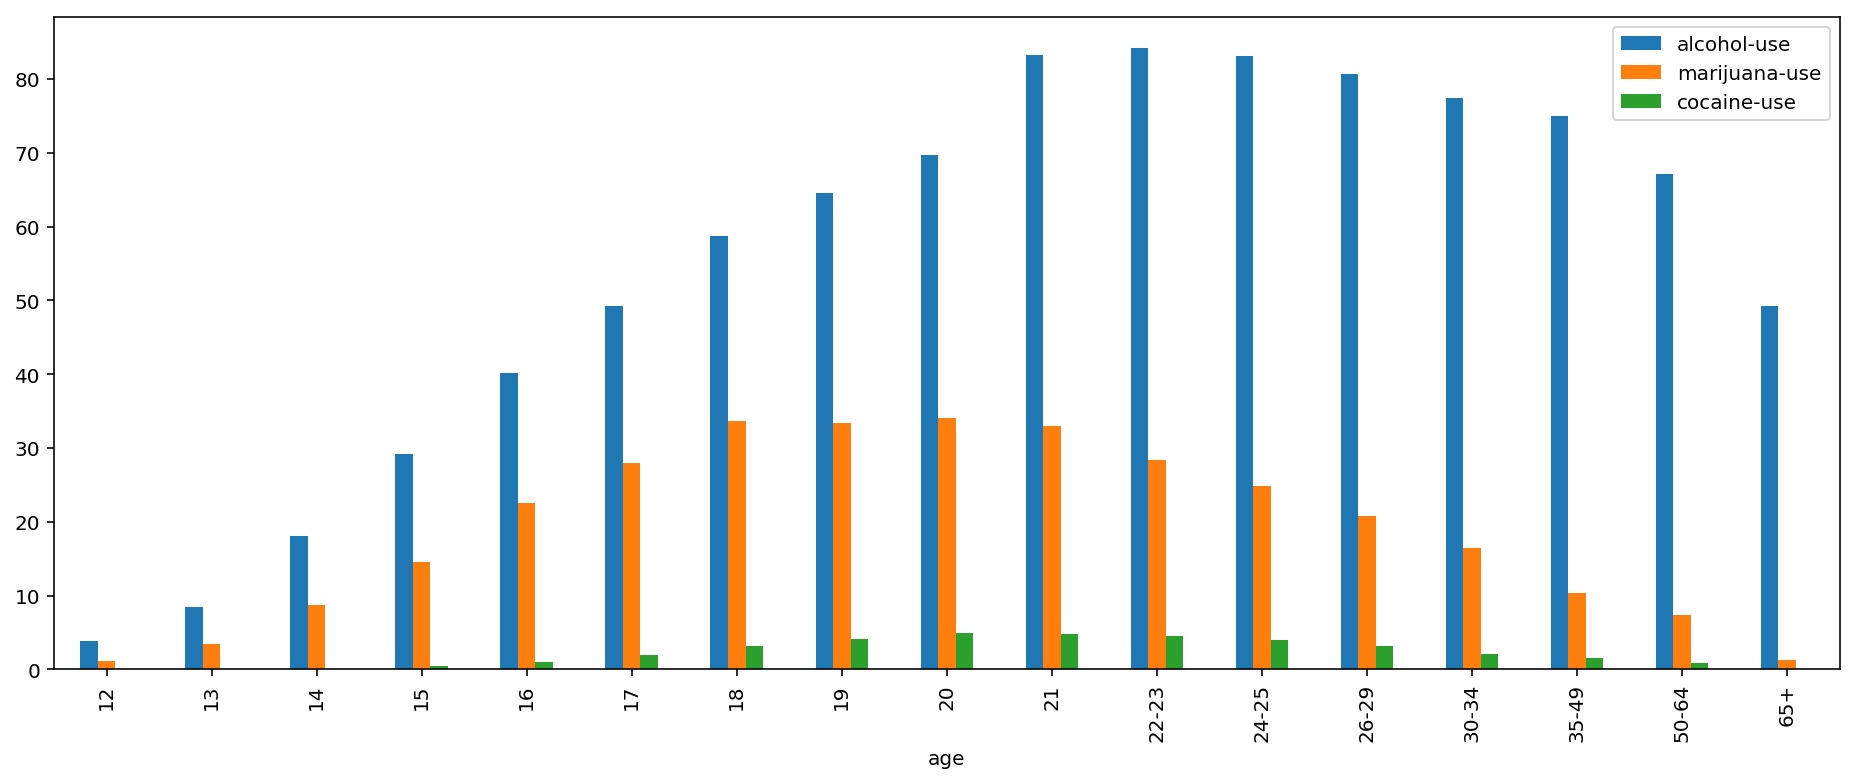

In [145]:
almaco_use.plot(kind='bar', figsize=(16,6))

#### bar plot

Text(0.5,0,'AGE')

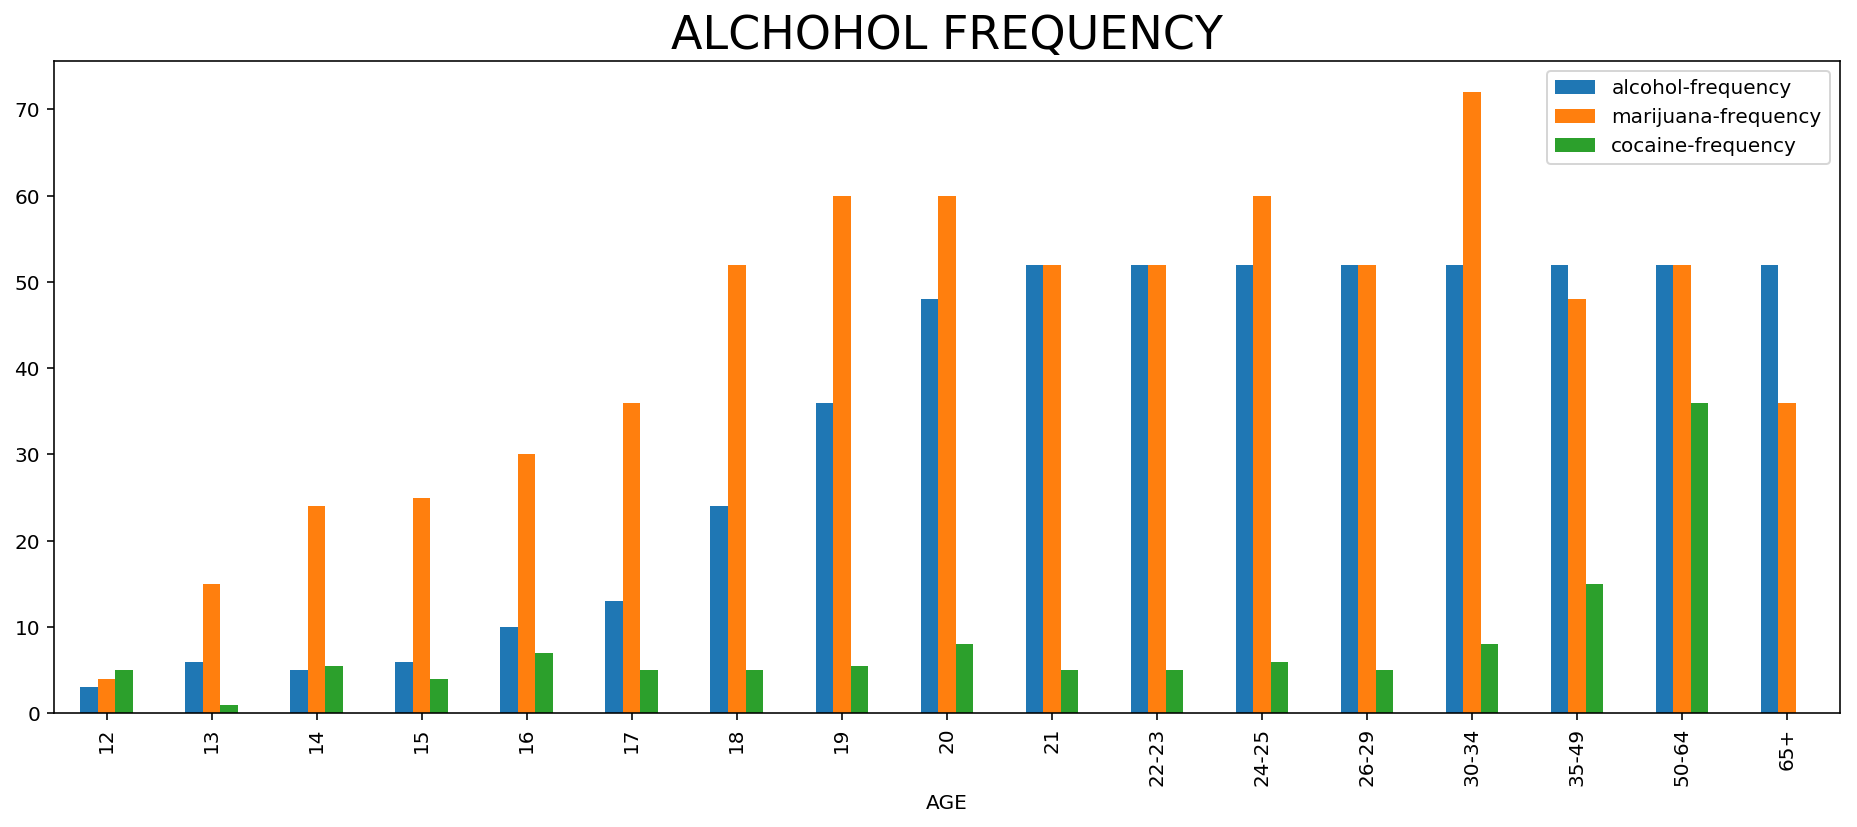

In [146]:
almaco_freq.plot(kind='bar', figsize=(16,6), fontsize=10)
plt.title('ALCHOHOL FREQUENCY', fontsize=23)
plt.xlabel('AGE')

#### pairplot

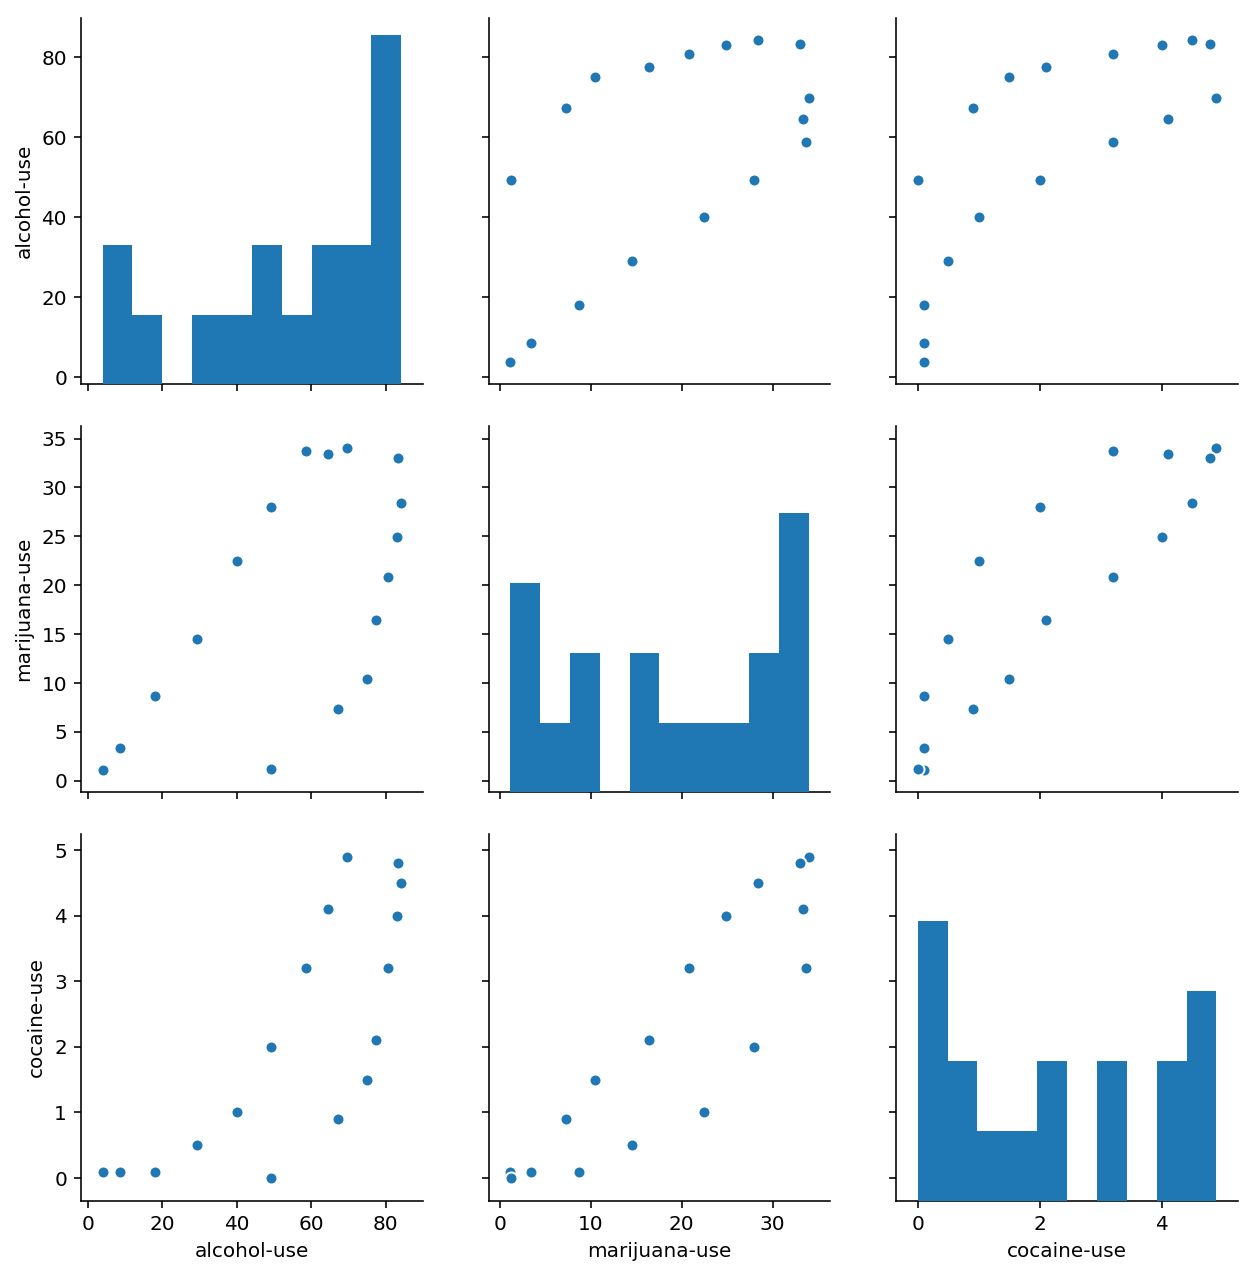

In [152]:
sns.pairplot(almaco_use, size=3)

#### pairplot

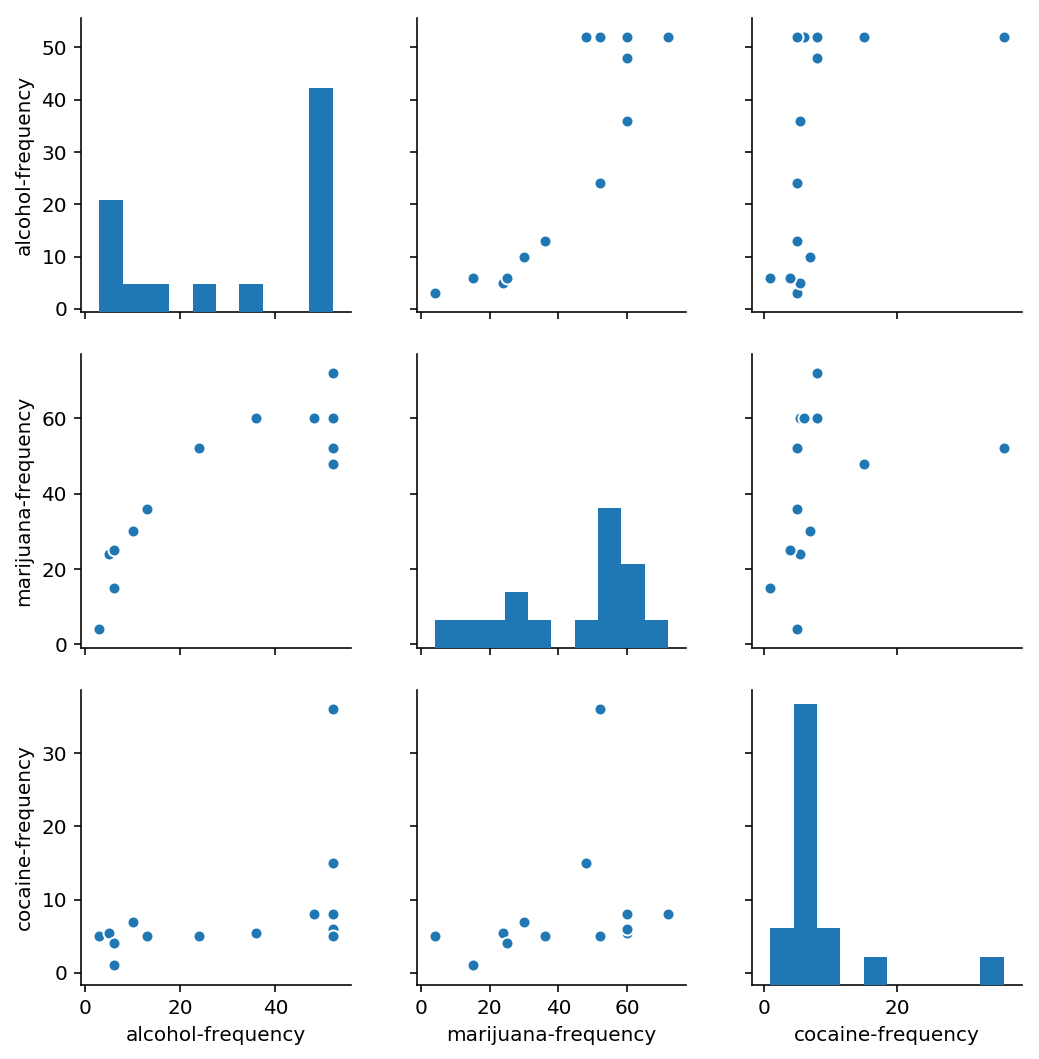

In [153]:
# I have to drop that row in order to plot this damn pair plot. It needs that np.nan cell filled.
almaco_freq_drop = almaco_freq.drop('65+', axis=0)
sns.pairplot(almaco_freq_drop)

In [154]:
almaco_use.corr()

,alcohol-use,marijuana-use,cocaine-use
alcohol-use,1.000000,0.594165,0.773458
marijuana-use,0.594165,1.000000,0.883789
cocaine-use,0.773458,0.883789,1.000000


In [155]:
almaco_freq.corr()

,alcohol-frequency,marijuana-frequency,cocaine-frequency
alcohol-frequency,1.000000,0.818769,0.391981
marijuana-frequency,0.818769,1.000000,0.250348
cocaine-frequency,0.391981,0.250348,1.000000


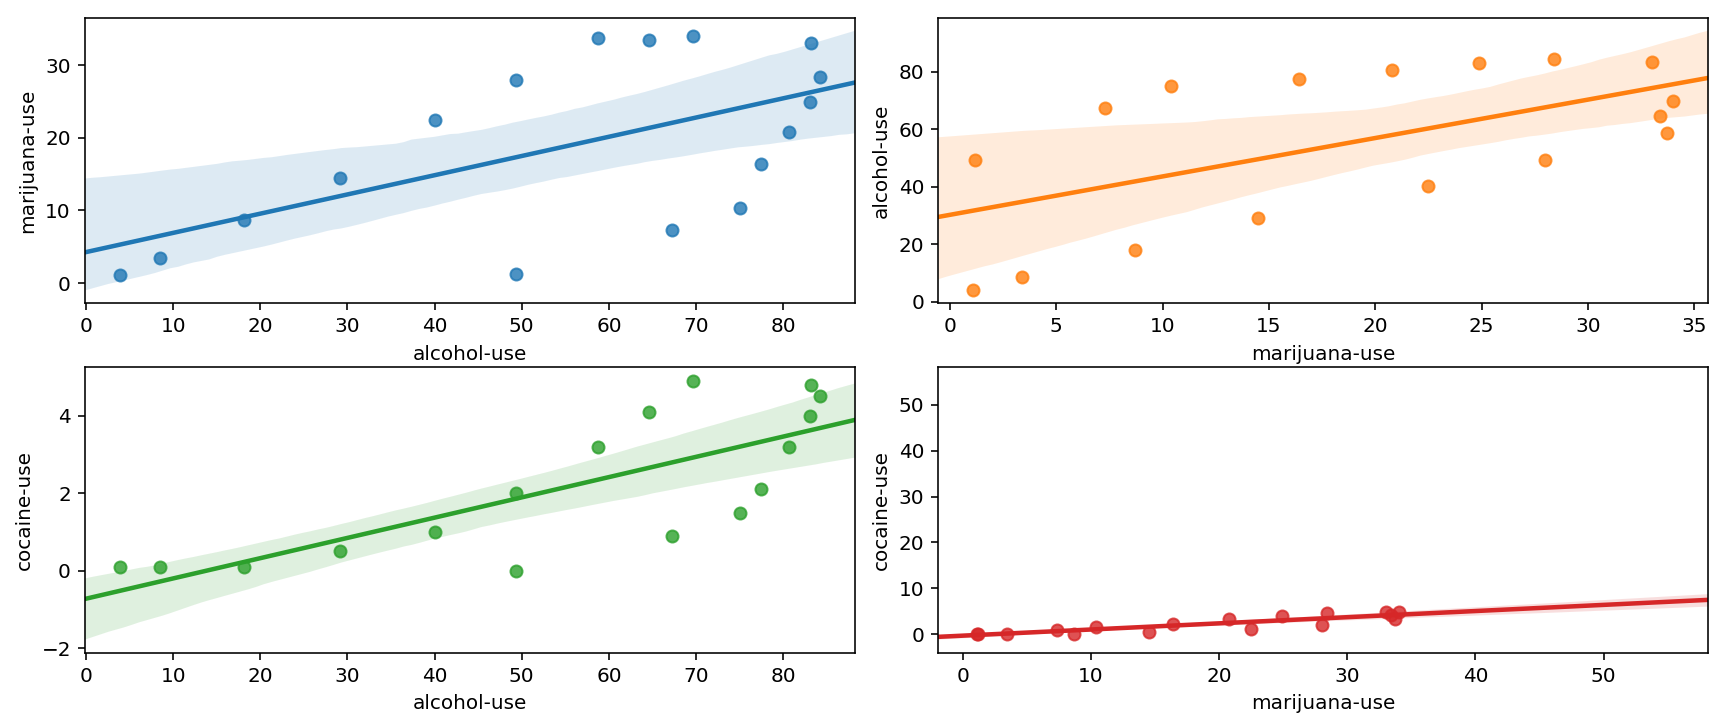

In [156]:
almar_corr =  almaco_use['alcohol-use'].corr(almaco_use['marijuana-use'])

fig, axes = plt.subplots(2,2, figsize=(12,5))
fig.tight_layout()
ax1 = sns.regplot(data=almaco_use, x='alcohol-use', y='marijuana-use', ax=axes[0][0])
ax2 = sns.regplot(data=almaco_use, x='marijuana-use', y='alcohol-use', ax=axes[0][1])
ax3 = ax1 = sns.regplot(data=almaco_use, x='alcohol-use', y='cocaine-use', ax=axes[1][0])
ax4 = ax1 = sns.regplot(data=almaco_use, x='marijuana-use', y='cocaine-use', ax=axes[1][1])

plt.show()

<h3> 8. Outliers </h2>

In [157]:
df_rate = df[['Rate']].copy()
print (df_rate.mean())
print (df_rate.std())
print (df_rate.min())
print (df_rate.max())
df_rate['Rate_zscore'] = (df_rate  - df_rate.mean()) / df_rate.std()

Rate    37.153846
dtype: float64
Rate    27.301788
dtype: float64
Rate    4
dtype: int64
Rate    82
dtype: int64


In [67]:
df_rate['Rate_zscore'] = df_rate['Rate_zscore'].apply(lambda x: round(x, 2))
df_rate.sort_values('Rate_zscore', ascending=True, inplace=True)

print (df_rate)

# Filtering out the data points that have a z-score above 1.5 i.e the data point's distance from the mean is 
# 1.5 x the standard deviation (average distance a point is from the mean.)
df_rate[(df_rate['Rate_zscore'] > 1.5) | (df_rate['Rate_zscore'] < -1.5)]


    Rate  Rate_zscore
49     4        -1.21
48     4        -1.21
50     4        -1.21
47     5        -1.18
46     5        -1.18
45     6        -1.14
44     6        -1.14
43     7        -1.10
42     8        -1.07
41     8        -1.07
40     8        -1.07
37     9        -1.03
39     9        -1.03
38     9        -1.03
36    11        -0.96
35    11        -0.96
34    12        -0.92
33    12        -0.92
32    13        -0.88
31    13        -0.88
30    17        -0.74
29    18        -0.70
28    23        -0.52
27    26        -0.41
26    31        -0.23
25    33        -0.15
24    34        -0.12
51    45         0.29
22    51         0.51
23    51         0.51
21    52         0.54
20    53         0.58
19    53         0.58
18    54         0.62
17    55         0.65
16    56         0.69
15    57         0.73
14    60         0.84
13    63         0.95
11    65         1.02
12    65         1.02
10    67         1.09
9     68         1.13
8     69         1.17
7     69  

,Rate,Rate_zscore
2,79,1.53
1,81,1.61
0,82,1.64


#### df_rate['Rate_zscore']

In [68]:
rate_drop_outlier = df_rate.drop(axis=0, index=[0,1,2])

#### Mean

In [71]:
print (rate_drop_outlier.mean())
print ('===')
print (df_rate.mean())

Rate           34.489796
Rate_zscore    -0.096939
dtype: float64
===
Rate           37.153846
Rate_zscore     0.000577
dtype: float64


#### Median

In [72]:
print (rate_drop_outlier.median())
print ('===')
print (df_rate.median())

Rate           31.00
Rate_zscore    -0.23
dtype: float64
===
Rate           33.500
Rate_zscore    -0.135
dtype: float64


#### Standard deviation 

In [158]:
print (rate_drop_outlier.std())
print ('===')
print (df_rate.std())

Rate           25.812725
Rate_zscore     0.945554
dtype: float64
===
Rate           27.301788
Rate_zscore     1.000000
dtype: float64


### 9. Percentile scoring and spearman rank correlation

#### Visualizing to get a feel first

0.9


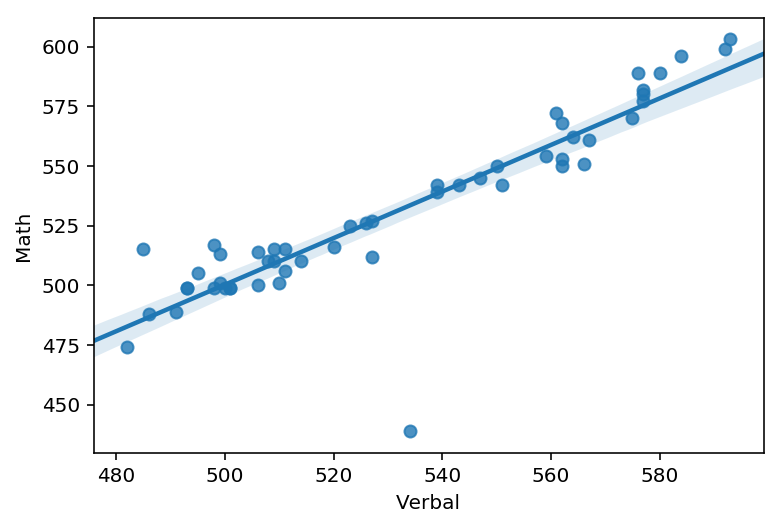

In [159]:
# Verbal against Math
sns.regplot(data=df, x='Verbal', y='Math')
print (round(df['Verbal'].corr(df['Math']),3))

0.9


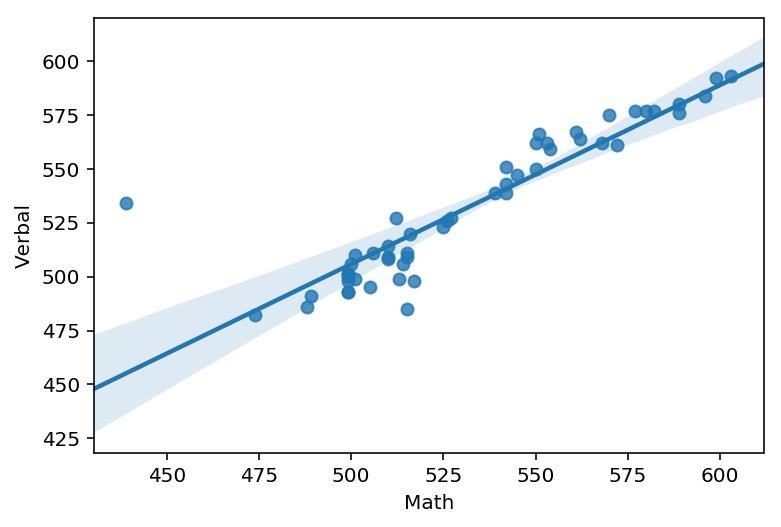

In [160]:
# Math against Verbal
sns.regplot(data=df, x='Math', y='Verbal')
print (round(df['Math'].corr(df['Verbal']),3))

#### Pearson correlation

In [161]:
df.corr()

,Rate,Verbal,Math,Verbal-Math,Math-Verbal
Rate,1.000000,-0.886432,-0.773746,-0.101412,0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600,-0.052600
Math,-0.773746,0.899871,1.000000,-0.388219,0.388219
Verbal-Math,-0.101412,0.052600,-0.388219,1.000000,-1.000000
Math-Verbal,0.101412,-0.052600,0.388219,-1.000000,1.000000


#### Spearman correlation - Stats library way

In [162]:
stats.spearmanr(verbal, math)

/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

#### Spearman correlation - Pandas library way

In [163]:
df.corr(method='spearman')

,Rate,Verbal,Math,Verbal-Math,Math-Verbal
Rate,1.000000,-0.833294,-0.813275,-0.014266,0.014266
Verbal,-0.833294,1.000000,0.905205,0.060244,-0.060244
Math,-0.813275,0.905205,1.000000,-0.239883,0.239883
Verbal-Math,-0.014266,0.060244,-0.239883,1.000000,-1.000000
Math-Verbal,0.014266,-0.060244,0.239883,-1.000000,1.000000


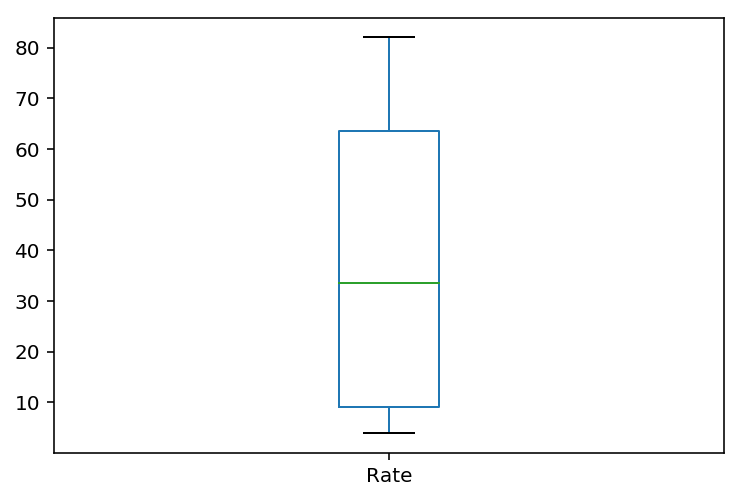

In [164]:
df['Rate'].plot(kind='box')

In [165]:
rate_percentile = df[['State','Rate']].copy()
rate_percentile['% of max score'] = df[['Rate']].rank(pct=True)
rate_percentile[rate_percentile['State'] == 'CA']

,State,Rate,% of max score
23,CA,51,0.567308


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [166]:
df_full['% of max score'] = rate_percentile['% of max score'].copy()
df_full.head(10)

,State,Rate,Verbal,Math,Rate_zscore,Verbal_zscore,Math_zscore,% of max score
0,CT,82,509,510,1.658635,-0.699352,-0.602798,1.000000
1,NJ,81,499,513,1.621650,-1.003164,-0.518687,0.980769
2,MA,79,511,515,1.547680,-0.638589,-0.462613,0.961538
3,NY,77,495,505,1.473710,-1.124689,-0.742984,0.942308
4,NH,72,520,516,1.288785,-0.365159,-0.434575,0.923077
5,RI,71,501,499,1.251800,-0.942401,-0.911207,0.894231
6,PA,71,500,499,1.251800,-0.972783,-0.911207,0.894231
7,VT,69,511,506,1.177830,-0.638589,-0.714947,0.855769
8,ME,69,506,500,1.177830,-0.790495,-0.883169,0.855769
9,VA,68,510,501,1.140845,-0.668971,-0.855132,0.826923


#### Plot the distribution of a variable of your choice from the drug use dataset.

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


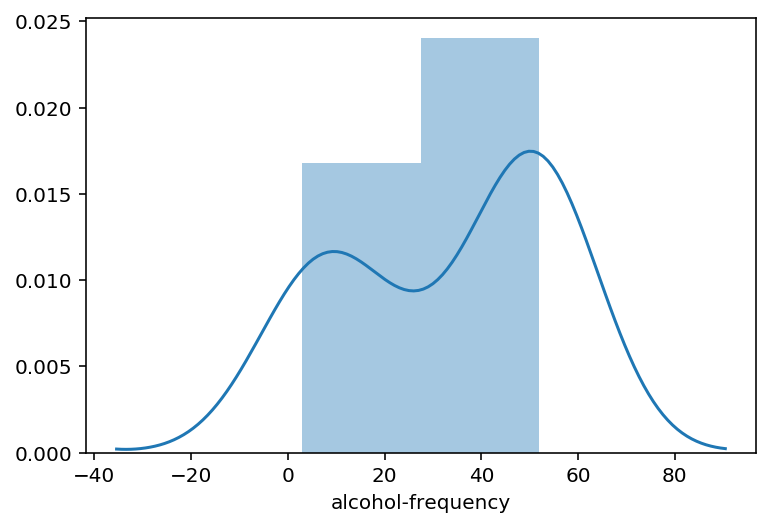

In [167]:
sns.distplot(drug_df['alcohol-frequency'])

#### Plot the same variable but percentile scored.

/anaconda2/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


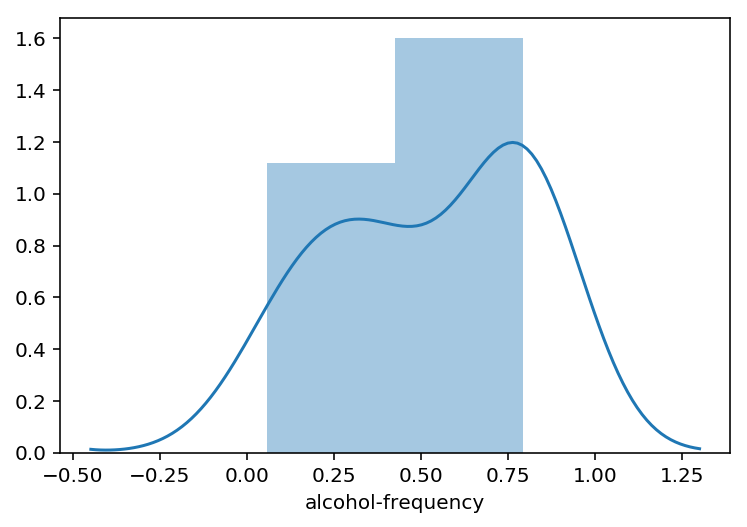

In [168]:
sns.distplot(drug_df['alcohol-frequency'].rank(pct=True))